In [1]:
# !/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on 

@author: zhangji
"""

%pylab inline
pylab.rcParams['figure.figsize'] = (18.5, 10.5)
fontsize = 40

import os
import importlib
from time import time
import numpy as np
import scipy as sp
import pandas as pd
import re
from scanf import scanf
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from scipy.optimize import leastsq, curve_fit
from IPython.display import display, HTML
from scipy import interpolate, integrate, optimize, sparse
from codeStore import support_fun as spf
from src import slenderBodyTheory as slb

PWD = os.getcwd()
np.set_printoptions(linewidth=130, precision=5)

params = {'animation.html': 'html5',
          'font.size':      '20', 
          'font.family':    'sans-serif'}
params['text.latex.preamble'] = [r'\usepackage{bm}',
                                 r'\usepackage{amsmath}',
                                 r'\usepackage{amssymb}',
                                 r'\usepackage{mathrsfs}',
                                 r'\usepackage{siunitx}',
                                 r'\DeclareMathOperator{\Tr}{Tr}', ]
params['text.usetex'] = True
plt.rcParams.update(params)

Populating the interactive namespace from numpy and matplotlib


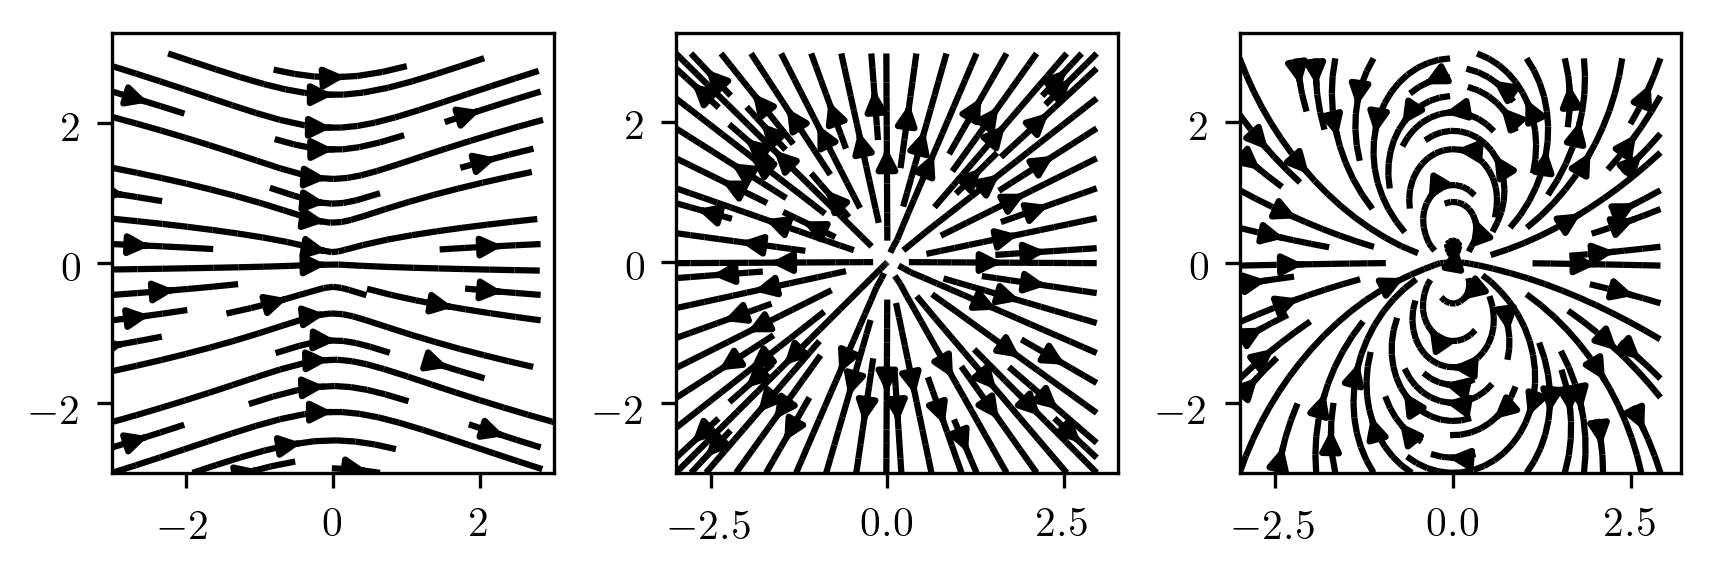

In [13]:
from matplotlib import colors as mcolors

# params = {'animation.html': 'html5',
#           'font.size':      '20', 
#           'font.family':    'sans-serif'}
# params['text.latex.preamble'] = [r'\usepackage{bm}',
#                                  r'\usepackage{amsmath}',
#                                  r'\usepackage{amssymb}',
#                                  r'\usepackage{mathrsfs}',
#                                  r'\usepackage{siunitx}',
#                                  r'\DeclareMathOperator{\Tr}{Tr}', ]
# params['text.usetex'] = True
# plt.rcParams.update(params)

F, Q, D = 1, 1, 1
tx = np.linspace(-3, 3, 34)
ty = np.linspace(-3, 3, 34)
figsize = np.array((28, 9)) * 0.2
dpi = 300

# tx, ty = np.meshgrid(tx, ty, indexing='ij')
tx, ty = np.meshgrid(tx, ty)
tr = np.sqrt(tx ** 2 + ty ** 2)
cmap = plt.get_cmap('viridis')
# norm = mcolors.LogNorm()
# norm = plt.Normalize(vmin=0.0, vmax=0.15)
norm = plt.Normalize()
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=figsize, dpi=dpi, constrained_layout=True)
fig.patch.set_facecolor('white')
# 
axi = axs[0]
vx = F / (8 * np.pi) * (1 / tr + (tx * tx) / tr ** 3)
vy = F / (8 * np.pi) * ((tx * ty) / tr ** 3)
axi.streamplot(tx, ty, vx, vy, color='k', density=0.6)
# 
axi = axs[1]
vx = Q / (4 * np.pi) * tx / tr ** 3
vy = Q / (4 * np.pi) * ty / tr ** 3
axi.streamplot(tx, ty, vx, vy, color='k', density=1)
# 
axi = axs[2]
vx = -D / (4 * np.pi) * (1 / tr ** 3 - (3 * tx * tx) / tr ** 5)
vy = -D / (4 * np.pi) * (- (3 * tx * ty) / tr ** 5)
axi.streamplot(tx, ty, vx, vy, color='k', density=0.8)

In [44]:
vx[50]

array([0.02652, 0.02707, 0.02764, 0.02823, 0.02885, 0.0295 , 0.03018, 0.03089, 0.03163, 0.03242, 0.03324, 0.0341 , 0.03501,
       0.03597, 0.03698, 0.03805, 0.03919, 0.04039, 0.04167, 0.04304, 0.0445 , 0.04606, 0.04773, 0.04953, 0.05147, 0.05357,
       0.05585, 0.05833, 0.06104, 0.06401, 0.06729, 0.07092, 0.07497, 0.0795 , 0.08462, 0.09045, 0.09713, 0.10487, 0.11396,
       0.12477, 0.13783, 0.15394, 0.1743 , 0.20082, 0.23678, 0.28823, 0.36767, 0.50511, 0.78891, 1.39268, 1.39268, 0.78891,
       0.50511, 0.36767, 0.28823, 0.23678, 0.20082, 0.1743 , 0.15394, 0.13783, 0.12477, 0.11396, 0.10487, 0.09713, 0.09045,
       0.08462, 0.0795 , 0.07497, 0.07092, 0.06729, 0.06401, 0.06104, 0.05833, 0.05585, 0.05357, 0.05147, 0.04953, 0.04773,
       0.04606, 0.0445 , 0.04304, 0.04167, 0.04039, 0.03919, 0.03805, 0.03698, 0.03597, 0.03501, 0.0341 , 0.03324, 0.03242,
       0.03163, 0.03089, 0.03018, 0.0295 , 0.02885, 0.02823, 0.02764, 0.02707, 0.02652])

In [51]:
vx.min(), vx.max()

(0.013263588379156269, 1.3926768015555246)